In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv("/content/twt_data.csv")

In [ ]:
print("Dataset size:", len(df))


Dataset size: 62380


In [ ]:
df.head(5)

,tweet_id,sentiment,content
0,1.956968e+09,sadness,Layin n bed with a headache ughhhh...waitin o...
1,1.956968e+09,sadness,Funeral ceremony...gloomy friday...
2,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...
3,1.956968e+09,worry,Re-pinging @ghostridah14: why didn't you go to...
4,1.956968e+09,sadness,"I should be sleep, but im not! thinking about ..."


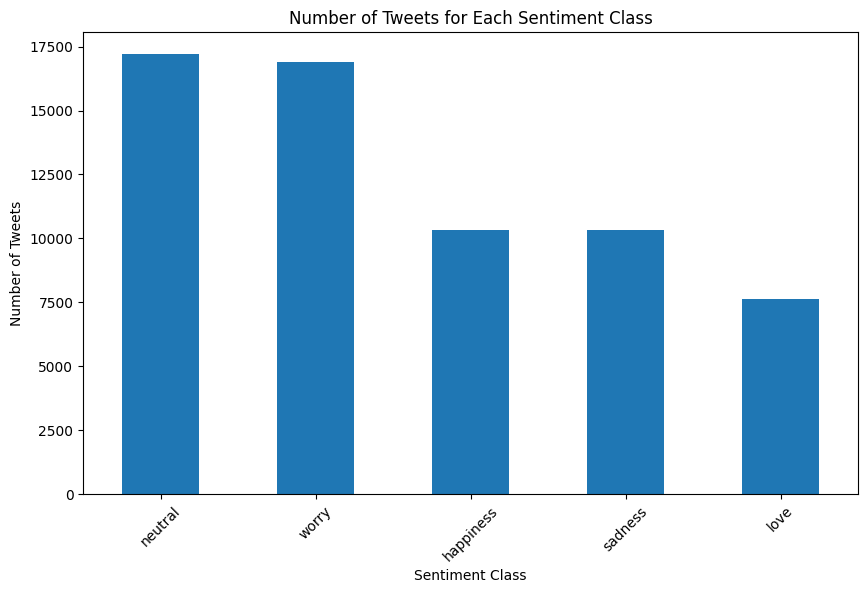

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.title('Number of Tweets for Each Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()


Pre-Processing datacleaning


In [ ]:
#before preprocessing
df['content']

0        Layin n bed with a headache  ughhhh...waitin o...
1                      Funeral ceremony...gloomy friday...
2        @dannycastillo We want to trade with someone w...
3        Re-pinging @ghostridah14: why didn't you go to...
4        I should be sleep, but im not! thinking about ...
                               ...                        
62375               Stupid alarm!! LOL Morning Twiits.....
62376    @mzfuller8, @mynervouscharm, @littlebirds, @so...
62377    @carrotmadman6 @sjdvda @Morinn The folks at MB...
62378     @makikaysantos http://bit.ly/izhdy  here looove.
62379    @BenWay08 mmm but nothing i can do. lucky ive ...
Name: content, Length: 62380, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Download the stopwords
nltk.download('stopwords')

stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re

# Define a regular expression pattern for text cleaning
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:  # Remove stopwords
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

df['content'] = df['content'].apply(lambda x: preprocess(x))


In [ ]:
df['content']

0                  layin n bed headache ughhhh waitin call
1                           funeral ceremony gloomy friday
2                   want trade someone houston tickets one
3          pinging ghostridah14 go prom bc bf like friends
4        sleep im thinking old friend want married damn...
                               ...                        
62375                      stupid alarm lol morning twiits
62376    mynervouscharm littlebirds sonsah hope happy m...
62377    sjdvda morinn folks mbb longer reviewing blogs...
62378                                               looove
62379    mmm nothing lucky ive got great friends like u...
Name: content, Length: 62380, dtype: object

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer  # Import the stemmer


def tokenize_text(text):
    cleaned_text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    # Tokenize the cleaned text
    tokens = word_tokenize(cleaned_text)
    return tokens

# Define a stemming function
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

nltk.download('punkt')

df['content'] = df['content'].apply(lambda x: stem_text(tokenize_text(x)))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['content']

0           [layin, n, bed, headach, ughhhh, waitin, call]
1                        [funer, ceremoni, gloomi, friday]
2              [want, trade, someon, houston, ticket, one]
3        [ping, ghostridah14, go, prom, bc, bf, like, f...
4        [sleep, im, think, old, friend, want, marri, d...
                               ...                        
62375                    [stupid, alarm, lol, morn, twiit]
62376    [mynervouscharm, littlebird, sonsah, hope, hap...
62377    [sjdvda, morinn, folk, mbb, longer, review, bl...
62378                                              [looov]
62379    [mmm, noth, lucki, ive, got, great, friend, li...
Name: content, Length: 62380, dtype: object

Data Labelling

In [ ]:
import pandas as pd

decode_map = {
    'neutral': 0,
    'worry': 1,
    'happiness': 2,
    'sadness': 3,
    'love': 4,
}

def decode_sentiment(label):
    return decode_map.get(label, -1)  # Default to -1 if label not found in decode_map


df['sentiment'] = df['sentiment'].apply(lambda x: decode_sentiment(x))

print(df)


           tweet_id  sentiment  \
0      1.956968e+09          3   
1      1.956968e+09          3   
2      1.956968e+09          0   
3      1.956968e+09          1   
4      1.956968e+09          3   
...             ...        ...   
62375  1.753855e+09          0   
62376  1.753855e+09          4   
62377  1.753855e+09          1   
62378  1.753855e+09          4   
62379  1.753855e+09          4   

                                                 content  
0         [layin, n, bed, headach, ughhhh, waitin, call]  
1                      [funer, ceremoni, gloomi, friday]  
2            [want, trade, someon, houston, ticket, one]  
3      [ping, ghostridah14, go, prom, bc, bf, like, f...  
4      [sleep, im, think, old, friend, want, marri, d...  
...                                                  ...  
62375                  [stupid, alarm, lol, morn, twiit]  
62376  [mynervouscharm, littlebird, sonsah, hope, hap...  
62377  [sjdvda, morinn, folk, mbb, longer, review, bl...  
6

Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df['content']  # Features (text data)
y = df['sentiment']  # Target (sentiments)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% temporary

# Further split the temporary set into validation and test sets (15% each)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



Feature Extraction:

In [ ]:
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Train a Word2Vec model on your tokenized data
model = Word2Vec(df['content'], vector_size=100, window=5, min_count=1, sg=0)  # Adjust parameters as needed

# Function to average Word2Vec vectors for each document
def document_vector(tokens, model):
    if len(tokens) == 0:
        return [0] * model.vector_size
    else:
        return np.mean([model.wv[token] for token in tokens], axis=0)

# Apply the function to create a feature matrix
df['word2vec_features'] = df['content'].apply(lambda x: document_vector(x, model))

# Now, df['word2vec_features'] contains the Word2Vec vector representations for your text data.




In [ ]:
df['word2vec_features']

0        [0.06482369, -0.018465152, -0.050029006, -0.17...
1        [0.103232846, 0.13249578, -0.29947636, -0.0069...
2        [-0.18602312, 0.31044486, -0.14676218, 0.02222...
3        [-0.0341632, 0.14622565, -0.2069796, -0.032082...
4        [0.10519391, 0.1971065, -0.12773184, -0.117883...
                               ...                        
62375    [0.13480118, 0.045798294, -0.230401, -0.062662...
62376    [0.1859715, -0.32894444, -0.56605977, 0.175273...
62377    [-0.1189913, 0.30644897, -0.0114104105, 0.2120...
62378    [-0.023173286, 0.08865234, 0.053189095, 0.0249...
62379    [0.07039583, 0.24051103, -0.21259432, -0.04279...
Name: word2vec_features, Length: 62380, dtype: object

In [ ]:
# Find similar words to a given word
similar_words = model.wv.most_similar('want', topn=5)
print("Words similar to 'want':", similar_words)



Words similar to 'want': [('soooooooon', 0.9051178693771362), ('let', 0.8925603628158569), ('multitask', 0.8846469521522522), ('msn', 0.8810252547264099), ('tweetphoto', 0.878006637096405)]


LSTM Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical


# Tokenization
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_valid_seq = tokenizer.texts_to_sequences(X_valid)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences to a fixed length
max_sequence_length = 100
X_train_seq = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_valid_seq = pad_sequences(X_valid_seq, maxlen=max_sequence_length)
X_test_seq = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# One-hot encode the labels (assuming y_train and y_valid are integer labels)
num_classes = 13
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_valid_one_hot = to_categorical(y_valid, num_classes=num_classes)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(num_classes, activation='softmax'))  # Use num_classes as the output size

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train_one_hot, validation_data=(X_valid_seq, y_valid_one_hot), epochs=10, batch_size=128)




Epoch 1/10
342/342 [==============================] - 120s 341ms/step - loss: 1.4605 - accuracy: 0.3567 - val_loss: 1.3295 - val_accuracy: 0.4311
Epoch 2/10
342/342 [==============================] - 113s 329ms/step - loss: 1.1491 - accuracy: 0.5348 - val_loss: 1.2067 - val_accuracy: 0.5142
Epoch 3/10
342/342 [==============================] - 116s 339ms/step - loss: 0.9688 - accuracy: 0.6296 - val_loss: 1.1890 - val_accuracy: 0.5362
Epoch 4/10
342/342 [==============================] - 116s 338ms/step - loss: 0.8417 - accuracy: 0.6865 - val_loss: 1.1583 - val_accuracy: 0.5659
Epoch 5/10
342/342 [==============================] - 112s 327ms/step - loss: 0.7401 - accuracy: 0.7310 - val_loss: 1.1363 - val_accuracy: 0.5981
Epoch 6/10
342/342 [==============================] - 113s 331ms/step - loss: 0.6700 - accuracy: 0.7584 - val_loss: 1.1043 - val_accuracy: 0.6221
Epoch 7/10
342/342 [==============================] - 112s 328ms/step - loss: 0.6067 - accuracy: 0.7824 - val_loss: 1.1078 -

In [ ]:
# Evaluate the model on the test set
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)  # One-hot encode test labels
loss, accuracy = model.evaluate(X_test_seq, y_test_one_hot)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

293/293 [==============================] - 14s 49ms/step - loss: 1.1105 - accuracy: 0.6686
Test loss: 1.1104737520217896, Test accuracy: 0.6685903668403625


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


# Evaluate the model on the test set
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)  # One-hot encode test labels
loss, accuracy = model.evaluate(X_test_seq, y_test_one_hot)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Predict sentiment labels for the test set
y_pred = model.predict(X_test_seq)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to labels

your_sentiment_labels = ['neutral', 'worry', 'happiness', 'sadness', 'love']
classification_report_result = classification_report(y_test, y_pred_labels, target_names=your_sentiment_labels)
print("Classification Report:\n", classification_report_result)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", confusion_mat)

# Analyze results for each sentiment category (assuming you have a list of sentiment labels)
your_sentiment_labels = ['neutral', 'worry', 'happiness', 'sadness', 'love']

for i, label in enumerate(your_sentiment_labels):
    category_accuracy = np.sum((y_test == i) & (y_pred_labels == i)) / np.sum(y_test == i)
    print(f'Category: {label} - Accuracy: {category_accuracy:.4f}')


293/293 [==============================] - 14s 47ms/step - loss: 1.1105 - accuracy: 0.6686
Test loss: 1.1104737520217896, Test accuracy: 0.6685903668403625
293/293 [==============================] - 14s 45ms/step
Classification Report:
               precision    recall  f1-score   support

     neutral       0.70      0.69      0.69      2600
       worry       0.68      0.68      0.68      2547
   happiness       0.69      0.62      0.65      1557
     sadness       0.63      0.62      0.62      1513
        love       0.62      0.71      0.66      1140

    accuracy                           0.67      9357
   macro avg       0.66      0.67      0.66      9357
weighted avg       0.67      0.67      0.67      9357

Confusion Matrix:
 [[1800  315  185  178  122]
 [ 327 1739   93  272  116]
 [ 178  126  972   64  217]
 [ 190  295   45  934   49]
 [  88   78  120   43  811]]
Category: neutral - Accuracy: 0.6923
Category: worry - Accuracy: 0.6828
Category: happiness - Accuracy: 0.6243
Cat

In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Define the sample texts
sample_texts = [
    "I'm feeling really happy today!",
    "I'm a bit worried about the upcoming exam.",
    "This movie was so boring and sad.",
    "I love spending time with my friends.",
    "The surprise birthday party was a blast!",
    "I had so much fun at the amusement park.",
    "This news brings relief to the affected families.",
    "I hate when it rains on a picnic day.",
    "I feel empty without you here.",
    "I'm overcome with boredom on a rainy day.",
    "I'm enthusiastic about the new project at work.",
    "The anger in his voice was unmistakable."
]

# Tokenize and preprocess the sample texts
max_sequence_length = 100  # Should match the sequence length used during training
tokenized_samples = tokenizer.texts_to_sequences(sample_texts)
padded_samples = pad_sequences(tokenized_samples, maxlen=max_sequence_length)

predictions = model.predict(padded_samples)

# Define the sentiment labels
sentiment_labels = ['neutral', 'worry', 'happiness', 'sadness', 'love']

# Identify the sentiment for each sample text
for i, prediction in enumerate(predictions):
    predicted_sentiment = sentiment_labels[np.argmax(prediction)]
    print(f"Text {i + 1}: Predicted Sentiment - {predicted_sentiment}")


1/1 [==============================] - 0s 43ms/step
Text 1: Predicted Sentiment - neutral
Text 2: Predicted Sentiment - neutral
Text 3: Predicted Sentiment - sadness
Text 4: Predicted Sentiment - love
Text 5: Predicted Sentiment - happiness
Text 6: Predicted Sentiment - happiness
Text 7: Predicted Sentiment - worry
Text 8: Predicted Sentiment - neutral
Text 9: Predicted Sentiment - worry
Text 10: Predicted Sentiment - neutral
Text 11: Predicted Sentiment - neutral
Text 12: Predicted Sentiment - happiness
